# Analysis of recruiting data vs success outcomes

In [1]:
# import dependencies and read in needed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fbsRecruitingFrame = pd.read_csv("Data/fbsRecruitingData.csv")
fbsRatingsFrame = pd.read_csv("Data/fbsRatingsData.csv")
fbsRatingsFrame['natlDelta'] = fbsRatingsFrame['rating'] - fbsRatingsFrame['nationalAverage']
fbsRatingsFrame

,season,team,rating,nationalAverage,natlDelta
0,2004,USC,32.3,1.461667,30.838333
1,2004,Oklahoma,28.8,1.461667,27.338333
2,2004,Auburn,27.3,1.461667,25.838333
3,2004,Miami,26.8,1.461667,25.338333
4,2004,California,26.7,1.461667,25.238333
...,...,...,...,...,...
1959,2019,Connecticut,-25.0,0.790840,-25.790840
1960,2019,UTEP,-26.2,0.790840,-26.990840
1961,2019,Bowling Green,-28.2,0.790840,-28.990840
1962,2019,Akron,-29.9,0.790840,-30.690840


In [2]:
# combine data
comboFrame = pd.merge(fbsRecruitingFrame,fbsRatingsFrame, on= ['season','team'], how='outer')
comboFrame = comboFrame[comboFrame['conference'].isin(['ACC','Pac-10','Pac-12','Big Ten','SEC','Big 12'])]
comboFrame = comboFrame.replace('Pac-10','Pac-12')
comboFrame.conference.unique()

array(['SEC', 'Pac-12', 'Big 12', 'ACC', 'Big Ten'], dtype=object)

In [3]:
# get average recruiting rank and win percentage of each team
groupedTeam = comboFrame.groupby(['team','conference','color'])

groupedStats = pd.DataFrame({'avgPoints':groupedTeam['recruitingPoints'].sum()/groupedTeam['recruitingPoints'].count(),
                             'avgRating':groupedTeam['rating'].sum()/groupedTeam['rating'].count(),
                             'avgNatlDelta':groupedTeam['natlDelta'].sum()/groupedTeam['natlDelta'].count(),
                             'numSeasons':groupedTeam['natlDelta'].count()
                            })
groupedStats = groupedStats.reset_index()
groupedStats

,team,conference,color,avgPoints,avgRating,avgNatlDelta,numSeasons
0,Alabama,SEC,#690014,283.966250,27.31250,25.837361,16
1,Arizona,Pac-12,#002449,186.649375,4.91250,3.437361,16
2,Arizona State,Pac-12,#942139,202.505000,10.18750,8.712361,16
3,Arkansas,SEC,#9c1831,212.593750,11.46250,9.987361,16
4,Auburn,SEC,#03244d,252.880000,18.53750,17.062361,16
...,...,...,...,...,...,...,...
64,Wake Forest,ACC,#9E7E38,151.818750,-0.55000,-2.025139,16
65,Washington,Pac-12,#2B2F64,208.059375,7.11875,5.643611,16
66,Washington State,Pac-12,#94022a,172.148125,1.10625,-0.368889,16
67,West Virginia,Big 12,#FFC600,196.235000,6.60000,5.013807,8


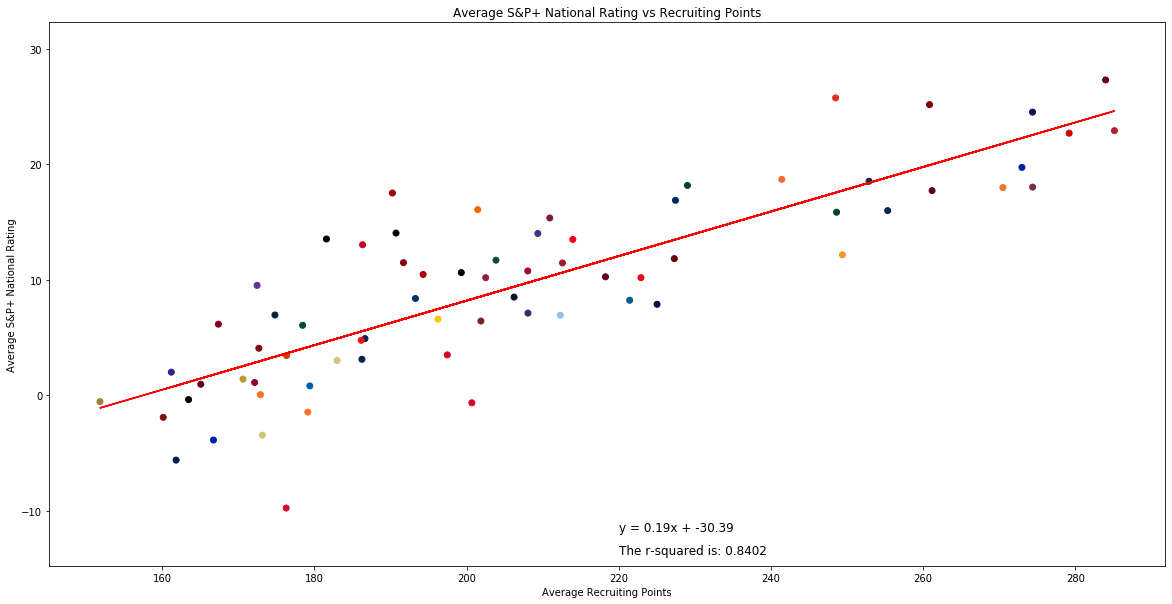

In [4]:
# create scatter/line plot of average win percentage vs average recruiting points
xvalues = groupedStats['avgPoints']
yvalues = groupedStats['avgRating']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(xvalues,yvalues,color=groupedStats['color'])
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(220,min(yvalues)-2),fontsize=12,color="black")
plt.annotate(f"The r-squared is: {round(rvalue,4)}",(220,min(yvalues)-4),fontsize=12,color="black")
plt.title('Average S&P+ National Rating vs Recruiting Points')
plt.xlabel('Average Recruiting Points')
plt.ylabel('Average S&P+ National Rating')
plt.ylim(min(yvalues)-5,max(yvalues)+5)
# save figure
plt.savefig("Figures/AverageSPRatingVsRecruitingPts.png")

In [5]:
# create columns for previous win percentage and recruiting class
comboFrame = comboFrame.sort_values(['conference','team','color','season'])
comboFrameTeam = comboFrame.groupby('team')

comboFramePrv = comboFrame
comboFramePrv['prvRating'] = comboFramePrv.groupby('team')['rating'].apply(lambda x: x.shift(1))
comboFramePrv['prvRecruitingPoints'] = comboFramePrv.groupby('team')['recruitingPoints'].apply(lambda x: x.shift(1))
comboFramePrv = comboFramePrv.dropna()
comboFramePrv

,season,team,id,mascot,abbreviation,conference,division,color,recruitingRank,recruitingPoints,rating,nationalAverage,natlDelta,prvRating,prvRecruitingPoints
251,2006,Boston College,103,Eagles,BC,ACC,Atlantic,#88001a,35.0,179.61,14.8,1.326050,13.473950,19.2,146.65
370,2007,Boston College,103,Eagles,BC,ACC,Atlantic,#88001a,44.0,168.51,16.7,1.346667,15.353333,14.8,179.61
490,2008,Boston College,103,Eagles,BC,ACC,Atlantic,#88001a,38.0,191.79,11.0,1.804167,9.195833,16.7,168.51
610,2009,Boston College,103,Eagles,BC,ACC,Atlantic,#88001a,65.0,164.59,12.7,1.375000,11.325000,11.0,191.79
730,2010,Boston College,103,Eagles,BC,ACC,Atlantic,#88001a,45.0,196.90,7.1,0.955833,6.144167,12.7,164.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2015,Vanderbilt,238,Commodores,VAN,SEC,East,#000000,49.0,181.37,-1.6,2.226562,-3.826563,-4.3,183.05
1580,2016,Vanderbilt,238,Commodores,VAN,SEC,East,#000000,54.0,171.54,-1.2,1.946875,-3.146875,-1.6,181.37
1710,2017,Vanderbilt,238,Commodores,VAN,SEC,East,#000000,65.0,167.42,0.6,1.669531,-1.069531,-1.2,171.54
1840,2018,Vanderbilt,238,Commodores,VAN,SEC,East,#000000,41.0,202.04,7.6,1.443077,6.156923,0.6,167.42


In [6]:
# get average recruiting rank and win percentage of each team
groupedTeamPrv = comboFramePrv.groupby(['team','conference','color'])

groupedStatsPrv = pd.DataFrame({'avgPoints':groupedTeamPrv['recruitingPoints'].sum()/groupedTeamPrv['recruitingPoints'].count(),
                                'avgPointsPrv':groupedTeamPrv['prvRecruitingPoints'].sum()/groupedTeamPrv['prvRecruitingPoints'].count(),
                                'avgRating':groupedTeamPrv['rating'].sum()/groupedTeamPrv['rating'].count(),
                                'avgRatingPrv':groupedTeamPrv['prvRating'].sum()/groupedTeamPrv['prvRating'].count(),
                                'numSeasons':groupedTeamPrv['natlDelta'].count()
                               })
groupedStatsPrv = groupedStatsPrv.reset_index()
groupedStatsPrv

,team,conference,color,avgPoints,avgPointsPrv,avgRating,avgRatingPrv,numSeasons
0,Alabama,SEC,#690014,290.112000,281.730667,28.520000,26.960000,15
1,Arizona,Pac-12,#002449,186.885556,187.005556,3.277778,5.588889,9
2,Arizona State,Pac-12,#942139,205.781111,203.950000,8.633333,9.477778,9
3,Arkansas,SEC,#9c1831,213.443333,210.955333,11.200000,12.873333,15
4,Auburn,SEC,#03244d,257.576667,251.609333,17.953333,18.320000,15
...,...,...,...,...,...,...,...,...
62,Virginia Tech,ACC,#74232D,213.302000,210.052667,15.053333,15.893333,15
63,Wake Forest,ACC,#9E7E38,156.905333,149.789333,-0.526667,-0.753333,15
64,Washington,Pac-12,#2B2F64,226.777778,224.017778,14.977778,13.322222,9
65,Washington State,Pac-12,#94022a,176.197778,176.557778,4.677778,2.588889,9


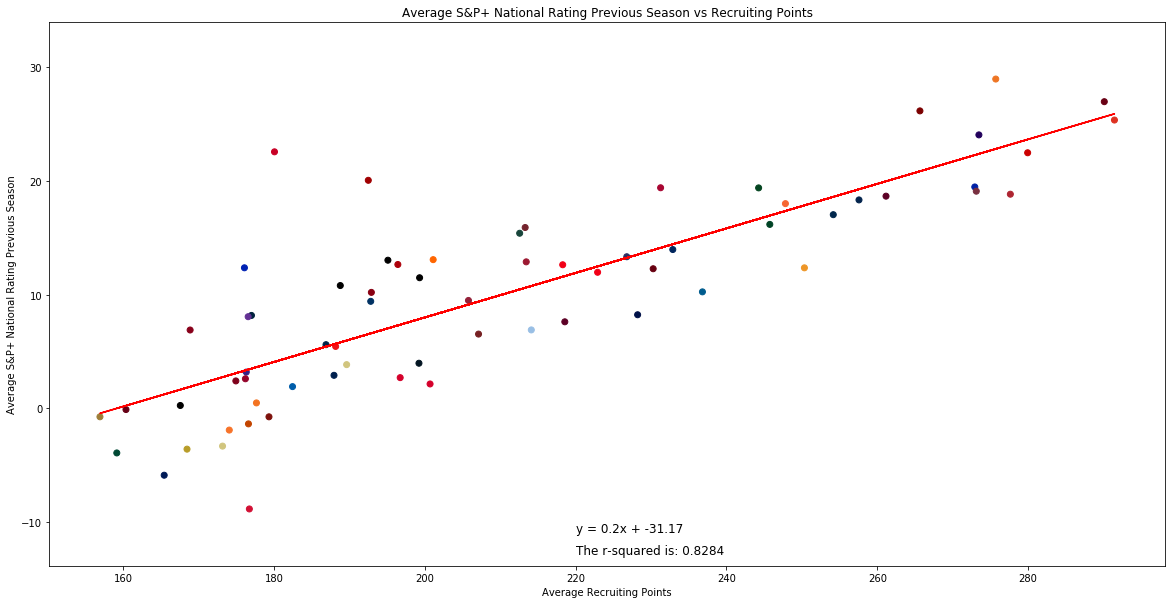

In [7]:
# create scatter/line plot of average win percentage for previous season vs average recruiting points
xvalues = groupedStatsPrv['avgPoints']
yvalues = groupedStatsPrv['avgRatingPrv']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(xvalues,yvalues,color=groupedStatsPrv['color'])
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(220,min(yvalues)-2),fontsize=12,color="black")
plt.annotate(f"The r-squared is: {round(rvalue,4)}",(220,min(yvalues)-4),fontsize=12,color="black")
plt.title('Average S&P+ National Rating Previous Season vs Recruiting Points')
plt.xlabel('Average Recruiting Points')
plt.ylabel('Average S&P+ National Rating Previous Season')
plt.ylim(min(yvalues)-5,max(yvalues)+5)
# save figure
plt.savefig("Figures/AverageSPRatingPrvVsRecruitingPts.png")

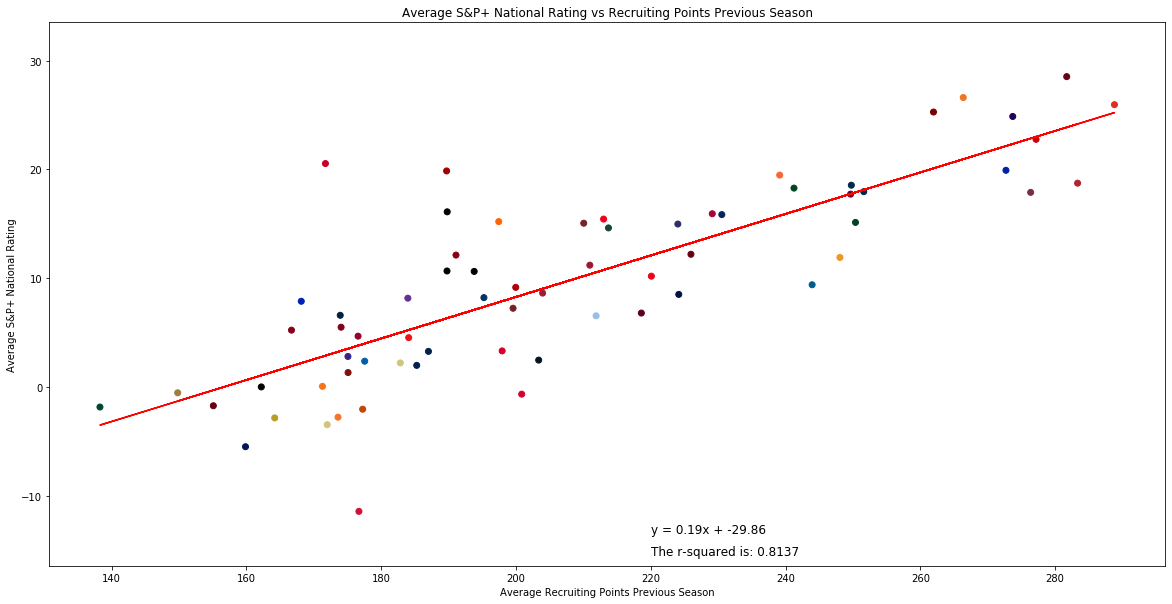

In [8]:
# create scatter/line plot of average win percentage vs average recruiting points for previous season
xvalues = groupedStatsPrv['avgPointsPrv']
yvalues = groupedStatsPrv['avgRating']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(xvalues,yvalues,color=groupedStatsPrv['color'])
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(220,min(yvalues)-2),fontsize=12,color="black")
plt.annotate(f"The r-squared is: {round(rvalue,4)}",(220,min(yvalues)-4),fontsize=12,color="black")
plt.title('Average S&P+ National Rating vs Recruiting Points Previous Season')
plt.xlabel('Average Recruiting Points Previous Season')
plt.ylabel('Average S&P+ National Rating')
plt.ylim(min(yvalues)-5,max(yvalues)+5)
# save figure
plt.savefig("Figures/AverageSPRatingVsRecruitingPtsPrv.png")